In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [23]:
# Load dataset from CSV
iris = pd.read_csv(r"C:\Users\Urvi\Downloads\archive (3)\iris.csv")

# Print column names to verify
print("Columns in dataset:", iris.columns)

# Drop the 'Id' column if present
if 'Id' in iris.columns:
    iris = iris.drop(columns=['Id'])

# Separate features (X) and target (y)
X = iris.iloc[:, :-1]  # All columns except the last one (Species)
y = iris.iloc[:, -1]   # Last column (Species)

# Rename columns correctly (Ensure correct feature names)
X.columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

Columns in dataset: Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [24]:
# Split dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Standardize feature values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
# Train KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # K=5
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

In [27]:
# Print Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 1.00


Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



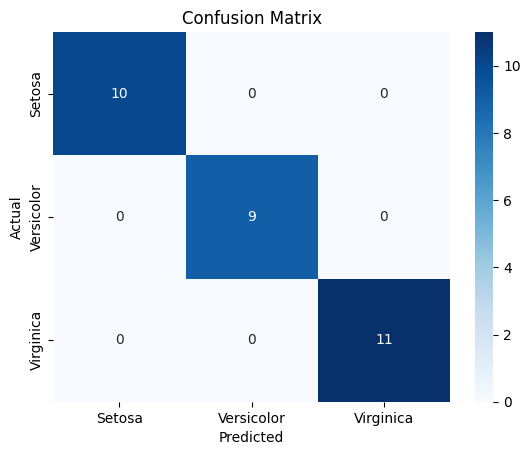

In [28]:
# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Define Target Names (Since they are missing in the CSV)
target_names = ['Setosa', 'Versicolor', 'Virginica']

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()